In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(3)

,WTGID,Loc,MonthStartDate,f1,f2,f3,f4,f5,f6,target,Dataset
0,1,0,1/1/2023 0:00,18,957.789366,20.874546,68.134813,70.717770,49.843224,0,model
1,1,0,3/1/2023 0:00,14,660.384368,15.092427,65.742906,68.528330,53.435904,2,model
2,1,0,10/1/2023 0:00,21,1210.950000,21.302701,66.728678,69.232881,47.930180,2,val


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WTGID           2820 non-null   int64  
 1   Loc             2820 non-null   int64  
 2   MonthStartDate  2820 non-null   object 
 3   f1              2820 non-null   int64  
 4   f2              2820 non-null   float64
 5   f3              2820 non-null   float64
 6   f4              2820 non-null   float64
 7   f5              2820 non-null   float64
 8   f6              2820 non-null   float64
 9   target          2820 non-null   int64  
 10  Dataset         2820 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 242.5+ KB


In [ ]:
df[['WTGID','Loc','f1','f2','f3','f4','f5','f6','target']].corr()

,WTGID,Loc,f1,f2,f3,f4,f5,f6,target
WTGID,1.000000,0.034182,0.017065,-0.040475,-0.088163,0.084385,0.071490,0.163242,-0.026732
Loc,0.034182,1.000000,0.365937,0.204213,0.320323,0.321758,0.309555,0.008818,0.118511
f1,0.017065,0.365937,1.000000,0.054668,0.836823,0.579921,0.541918,-0.258967,0.080514
f2,-0.040475,0.204213,0.054668,1.000000,0.024391,0.109901,0.110504,0.092536,0.066290
f3,-0.088163,0.320323,0.836823,0.024391,1.000000,0.570278,0.526217,-0.437809,0.074970
f4,0.084385,0.321758,0.579921,0.109901,0.570278,1.000000,0.982203,0.471510,0.426322
f5,0.071490,0.309555,0.541918,0.110504,0.526217,0.982203,1.000000,0.534139,0.442400
f6,0.163242,0.008818,-0.258967,0.092536,-0.437809,0.471510,0.534139,1.000000,0.393216
target,-0.026732,0.118511,0.080514,0.066290,0.074970,0.426322,0.442400,0.393216,1.000000


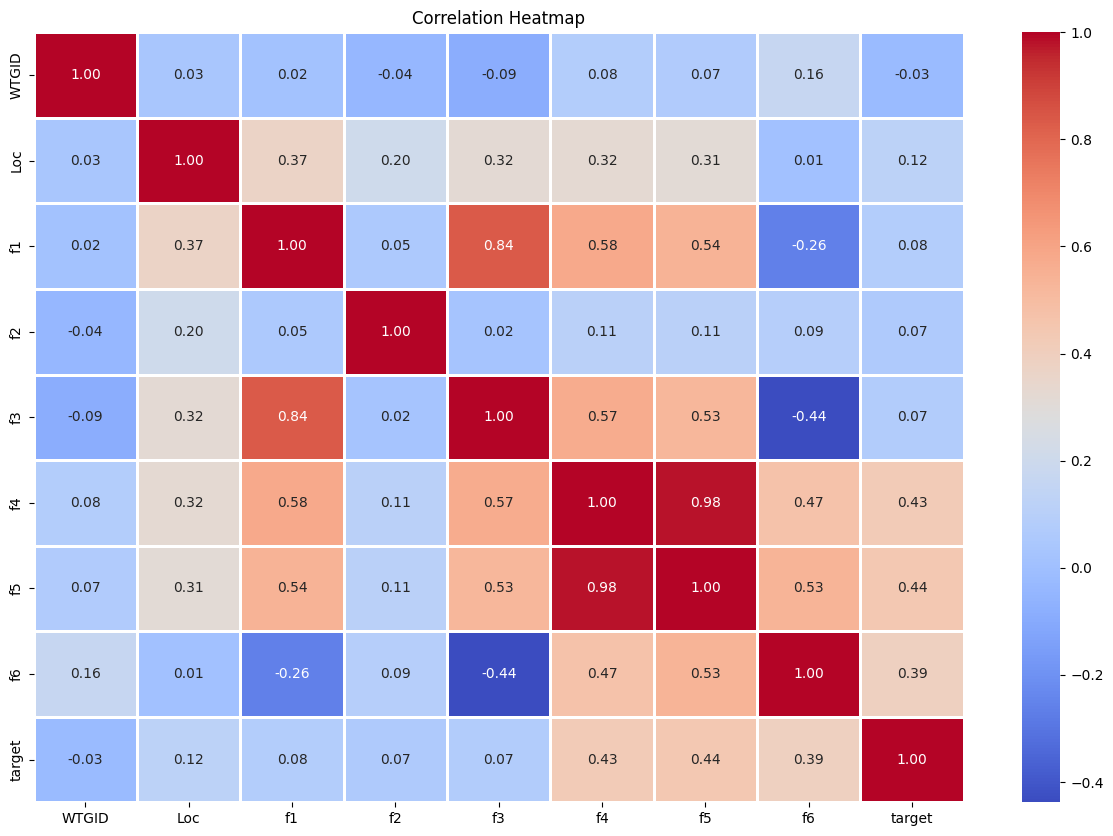

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['WTGID','Loc','f1','f2','f3','f4','f5','f6','target']].corr(),fmt='.2f',annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.isnull().sum()

,0
WTGID,0
Loc,0
MonthStartDate,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
target,0


In [ ]:
df.describe()

,WTGID,Loc,f1,f2,f3,f4,f5,f6,target
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,216.631915,0.061702,10.729078,590.811120,17.829852,53.851848,56.548878,38.719293,0.081560
std,129.716773,0.240656,6.663051,478.954251,5.361120,5.518501,5.701417,5.392273,0.395631
min,1.000000,0.000000,-2.000000,0.010603,10.021329,40.188585,41.860309,21.589952,0.000000
25%,99.000000,0.000000,5.000000,270.728276,12.318893,50.208231,52.659107,34.779167,0.000000
50%,210.000000,0.000000,10.000000,440.309314,18.886098,53.157792,55.676294,38.474893,0.000000
75%,308.000000,0.000000,15.000000,764.052515,20.475774,56.575462,59.412532,42.268017,0.000000
max,479.000000,1.000000,35.000000,2908.814992,38.974796,78.220308,81.260332,55.025626,2.000000


In [ ]:
df['target'].value_counts()

,count
target,
0,2705
2,115


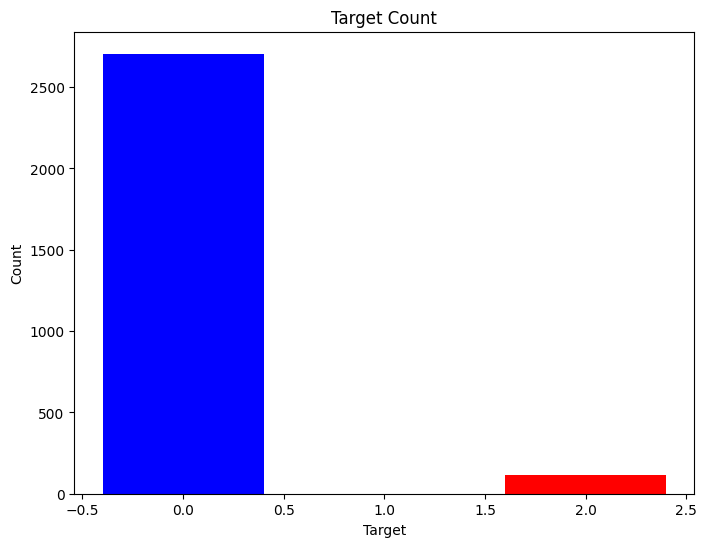

In [ ]:
target = df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target.index, target, color=['blue', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Count')
plt.show()

In [ ]:
df_train = df[df['Dataset']=='model']
df_val = df[df['Dataset']=='val']

In [ ]:
df['target'].value_counts(),df_train['target'].value_counts(),df_val['target'].value_counts()

(target
 0    2705
 2     115
 Name: count, dtype: int64,
 target
 0    1131
 2      79
 Name: count, dtype: int64,
 target
 0    1574
 2      36
 Name: count, dtype: int64)

In [ ]:
df_train.drop(['MonthStartDate','Dataset'],axis=1,inplace=True)
df_val.drop(['MonthStartDate','Dataset'],axis=1,inplace=True)

In [ ]:
df_train.head()

,WTGID,Loc,f1,f2,f3,f4,f5,f6,target
0,1,0,18,957.789366,20.874546,68.134813,70.717770,49.843224,0
1,1,0,14,660.384368,15.092427,65.742906,68.528330,53.435904,2
7,2,0,17,777.074521,21.778272,62.691870,66.175533,44.397261,0
9,3,0,15,674.619574,17.731228,50.977072,52.650069,34.918841,0
15,4,0,15,1211.712510,20.281886,58.239950,62.607915,42.326029,2


In [ ]:
!pip install xgboost

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
# Relabel target variable for XGBoost
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

models ={'XGBoost' : XGBClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Use relabeled training data

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Use relabeled training data for evaluation
    model_train_precision = precision_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_recall = recall_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_rocauc_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) # Use relabeled training data for evaluation

    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Use relabeled testing data for evaluation
    model_test_precision = precision_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_recall = recall_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_rocauc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) # Use relabeled testing data for evaluation

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

XGBoost
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9776
- F1 Score: 0.9792
- Precision: 0.5000
- Recall: 0.6667
- ROC AUC Score: 0.9396




In [ ]:
xgboost_params = {"learning_rate" : [0.1,0.01],
                  "max_depth": [5,8,12,20,30],
                  "n_estimators": [100,200,300],
                  "coalsample_bytree": [0.5,0.8,1.0,0.3,0.4]}

In [ ]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'coalsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4]}

In [ ]:
randomcv_models = [
    ("XGB", XGBClassifier(), xgboost_params)

                   ]

In [ ]:
randomcv_models

[('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'learning_rate': [0.1, 0.01],
   'max_depth': [5, 8, 12, 20, 30],
   'n_estimators': [100, 200, 300],
   'coalsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for XGB -------------------
{'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.01, 'coalsample_bytree': 0.3}


In [ ]:
models={
    "XGBoost": XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.01,coalsample_bytree=0.3)}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

XGBoost
Model performance for Training set
- Accuracy: 0.9876
- F1 score: 0.9870
- Precision: 1.0000
- Recall: 0.8101
- Roc Auc Score: 0.9051
----------------------------------
Model performance for Test set
- Accuracy: 0.9851
- F1 score: 0.9842
- Precision: 0.7143
- Recall: 0.5556
- Roc Auc Score: 0.7752


